---

#  mplfinance xticks experiments

---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

### Read in daily data for the S&P 500 from November of 2019 

In [3]:
df = pd.read_csv('../data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)
df.index.name = 'Date'
df.shape
df.head(2)
df.tail(2)

(1563, 5)

,Open,Close,High,Low,Volume
Date,,,,,
2019-11-05 09:30:00,3080.80,3080.49,3081.47,3080.30,0
2019-11-05 09:31:00,3080.33,3079.36,3080.33,3079.15,0


,Open,Close,High,Low,Volume
Date,,,,,
2019-11-08 15:58:00,3090.73,3091.04,3091.13,3090.58,0
2019-11-08 15:59:00,3091.16,3092.91,3092.91,3090.96,0


In [4]:
df.index.to_pydatetime()

array([datetime.datetime(2019, 11, 5, 9, 30),
       datetime.datetime(2019, 11, 5, 9, 31),
       datetime.datetime(2019, 11, 5, 9, 32), ...,
       datetime.datetime(2019, 11, 8, 15, 57),
       datetime.datetime(2019, 11, 8, 15, 58),
       datetime.datetime(2019, 11, 8, 15, 59)], dtype=object)

In [5]:
import mplfinance as mpf
mpf.__version__

'0.12.7a9'

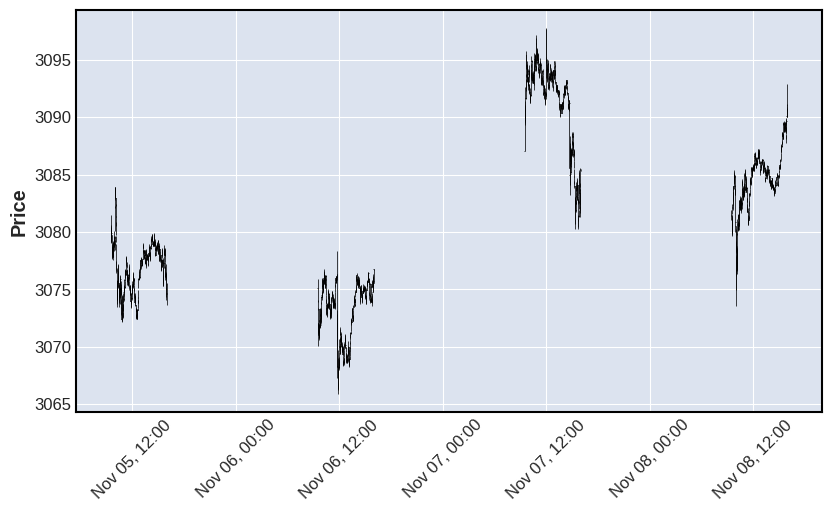

In [6]:
fig, axlist = mpf.plot(df,figratio=(9,5),returnfig=True,show_nontrading=True)

In [7]:
df['TimeStamp'] = df.index.values

In [8]:
df.head()

,Open,Close,High,Low,Volume,TimeStamp
Date,,,,,,
2019-11-05 09:30:00,3080.80,3080.49,3081.47,3080.30,0,2019-11-05 09:30:00
2019-11-05 09:31:00,3080.33,3079.36,3080.33,3079.15,0,2019-11-05 09:31:00
2019-11-05 09:32:00,3079.43,3079.68,3080.46,3079.43,0,2019-11-05 09:32:00
2019-11-05 09:33:00,3079.73,3079.15,3080.22,3079.12,0,2019-11-05 09:33:00
2019-11-05 09:34:00,3079.20,3079.62,3080.03,3079.07,0,2019-11-05 09:34:00


In [9]:
df['TSdate'] = [t.date() for t in df['TimeStamp']]

In [10]:
dfg = df.groupby('TSdate')

In [11]:
dfg.first()
dfg.last()
dfg.median()
#dir(dfg)

,Open,Close,High,Low,Volume,TimeStamp
TSdate,,,,,,
2019-11-05,3080.80,3080.49,3081.47,3080.30,0,2019-11-05 09:30:00
2019-11-06,3075.10,3074.12,3075.91,3073.90,0,2019-11-06 09:30:00
2019-11-07,3087.02,3089.93,3090.17,3087.02,0,2019-11-07 09:30:00
2019-11-08,3081.25,3081.47,3081.93,3081.07,0,2019-11-08 09:30:00


,Open,Close,High,Low,Volume,TimeStamp
TSdate,,,,,,
2019-11-05,3074.78,3074.75,3074.78,3074.75,0,2019-11-05 16:00:00
2019-11-06,3076.74,3076.73,3076.74,3076.72,0,2019-11-06 16:00:00
2019-11-07,3085.41,3085.35,3085.44,3085.35,0,2019-11-07 16:00:00
2019-11-08,3091.16,3092.91,3092.91,3090.96,0,2019-11-08 15:59:00


,Open,Close,High,Low,Volume
TSdate,,,,,
2019-11-05,3077.300,3077.270,3077.530,3077.060,0
2019-11-06,3073.970,3073.970,3074.270,3073.790,0
2019-11-07,3092.590,3092.580,3092.790,3092.380,0
2019-11-08,3084.785,3084.805,3084.965,3084.595,0


In [12]:
xt = []
for t in dfg.first()['TimeStamp']:
    xt.append(df.index.get_loc(t))

In [13]:
xt

[0, 391, 782, 1173]

In [14]:
axlist[0].set_xticks(xt)

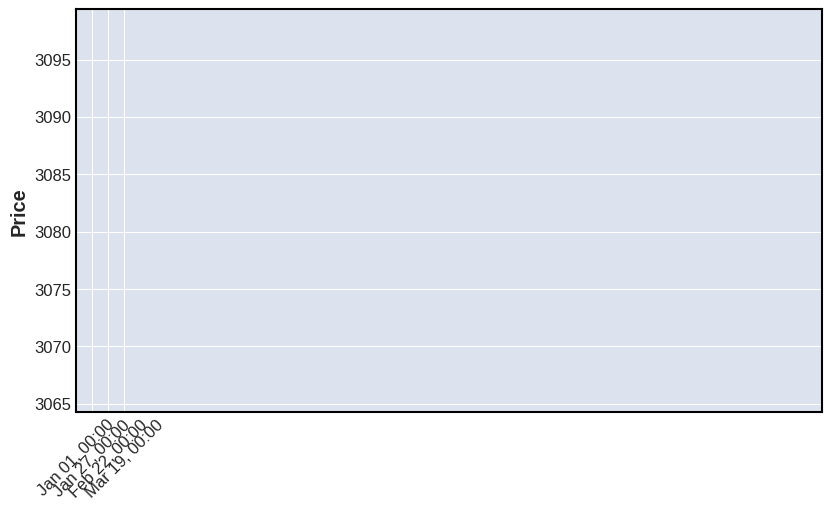

In [15]:
fig

In [16]:
xt = []
for t1,t2 in zip(dfg.first()['TimeStamp'],dfg.last()['TimeStamp']):
    print('t1,t2,t2-t1=',t1,t2,t2-t1)

t1,t2,t2-t1= 2019-11-05 09:30:00 2019-11-05 16:00:00 0 days 06:30:00
t1,t2,t2-t1= 2019-11-06 09:30:00 2019-11-06 16:00:00 0 days 06:30:00
t1,t2,t2-t1= 2019-11-07 09:30:00 2019-11-07 16:00:00 0 days 06:30:00
t1,t2,t2-t1= 2019-11-08 09:30:00 2019-11-08 15:59:00 0 days 06:29:00


In [17]:
td = t2-t1

In [18]:
td.seconds
td.total_seconds()

23340

23340.0

In [19]:
23340 / (60*60)
int(23340 / (60*60))/2

6.483333333333333

3.0

In [20]:
STOP HERE

SyntaxError: invalid syntax (<ipython-input-20-a6774c8535dd>, line 1)

In [ ]:
#del fig
#fig, axlist = mpf.plot(df,figratio=(9,5),returnfig=True,show_nontrading=True)
fig, axlist = mpf.plot(df,figratio=(9,5),returnfig=True,show_nontrading=True)

In [ ]:
axlist[0].get_xticks()

In [ ]:
import matplotlib.dates as mdates

In [ ]:
locator = mdates.HourLocator(interval=4)

In [ ]:
axlist[0].xaxis.set_major_locator(locator)

In [ ]:
axlist[0].get_xticks()

In [ ]:
fig

In [37]:
# %load datelocator.py
#import numpy as np
#import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from   dateutil import parser as dp
import pandas as pd

loc = mdates.AutoDateLocator()

vmin = dp.parse('2021-02-01 09:30')
vmax = dp.parse('2021-02-01 16:00')
print('vmin=',vmin,' vmax=',vmax)
print('type(vmin)=',type(vmin))

ticks = loc.tick_values(vmin, vmax)
print('ticks=')
for dt in mdates.num2date(ticks):
    print(dt)


vmin= 2021-02-01 09:30:00  vmax= 2021-02-01 16:00:00
type(vmin)= <class 'datetime.datetime'>
ticks=
2021-02-01 10:00:00+00:00
2021-02-01 11:00:00+00:00
2021-02-01 12:00:00+00:00
2021-02-01 13:00:00+00:00
2021-02-01 14:00:00+00:00
2021-02-01 15:00:00+00:00
2021-02-01 16:00:00+00:00


In [38]:
loc = mdates.HourLocator()
ticks = loc.tick_values(vmin, vmax)
print('ticks=')
for dt in mdates.num2date(ticks):
    print(dt)

ticks=
2021-02-01 10:00:00+00:00
2021-02-01 11:00:00+00:00
2021-02-01 12:00:00+00:00
2021-02-01 13:00:00+00:00
2021-02-01 14:00:00+00:00
2021-02-01 15:00:00+00:00
2021-02-01 16:00:00+00:00


In [49]:
loc1 = mdates.MinuteLocator(byminute=30,interval=30)

vmin = dp.parse('2021-02-01 07:00')
vmax = dp.parse('2021-02-01 16:00')

ticks = loc1.tick_values(vmin, vmax)
print('ticks=')
for dt in mdates.num2date(ticks):
    print(dt)

ValueError: Invalid rrule byxxx generates an empty set.

In [ ]:
loc2 = mdates.MinuteLocator(byminute=30,interval=1)
ticks = loc2.tick_values(vmin, vmax)
print('ticks=')
for dt in mdates.num2date(ticks):
    print(dt)

In [ ]:
vmin = dp.parse('2019-11-05 09:30:00')
vmax = dp.parse('2019-11-08 15:59:00')
print('vmin=',vmin,' vmax=',vmax)
print('type(vmin)=',type(vmin))

ticks = loc.tick_values(vmin, vmax)
print('ticks=')
for dt in mdates.num2date(ticks):
    print(dt)

df = pd.read_csv('examples/data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)
print('df.shape=',df.shape)
print('df.head(2)=',df.head(2))
print('df.tail(2)=',df.tail(2))

pydtm = df.index.to_pydatetime()
#  loc = mdates.HourLocator(byhour=pydtm,interval=3)
loc = mdates.HourLocator(byhour=(10,12,14,16),interval=1)

ticks = loc.tick_values(pydtm[0],pydtm[-1])
print('ticks=')
for dt in mdates.num2date(ticks):
    print(dt)



In [50]:
import datetime
from   dateutil import parser as dp
from   dateutil import rrule as rr
import dateutil.relativedelta as rd

In [34]:
vmin = dp.parse('2019-11-05 09:30:00')
#vmax = dp.parse('2019-11-08 15:59:00')
vmax = dp.parse('2019-11-05 15:59:00')

In [52]:
delta = rd.relativedelta(vmin,vmax)
type(delta)
delta

dateutil.relativedelta.relativedelta

relativedelta(hours=-6, minutes=-30)

In [63]:
r = rr.rrule(freq=rr.MINUTELY,dtstart=vmin,until=vmax,interval=120)

type(r)

ri = r.__iter__()

ri.__next__()
ri.__next__()
ri.__next__()
ri.__next__()
ri.__next__()

dateutil.rrule.rrule

datetime.datetime(2021, 2, 1, 9, 30)

datetime.datetime(2021, 2, 1, 11, 30)

datetime.datetime(2021, 2, 1, 13, 30)

datetime.datetime(2021, 2, 1, 15, 30)

StopIteration: 

In [64]:
list(rr.rrule(freq=rr.MINUTELY,dtstart=vmin,until=vmax,interval=120))

[datetime.datetime(2021, 2, 1, 9, 30),
 datetime.datetime(2021, 2, 1, 11, 30),
 datetime.datetime(2021, 2, 1, 13, 30),
 datetime.datetime(2021, 2, 1, 15, 30)]

In [73]:
vmin = dp.parse('2019-11-05 09:30:00')
vmax = dp.parse('2019-11-05 15:59:00')

delta = rd.relativedelta(vmin,vmax)
delta
delta = - delta / 5.0
delta
print('vmin=',vmin,' vmax=',vmax)
vmin = vmin - delta
vmax = vmax + delta
print('vmin=',vmin,' vmax=',vmax)

relativedelta(hours=-6, minutes=-29)

relativedelta(hours=+1, minutes=+5)

vmin= 2019-11-05 09:30:00  vmax= 2019-11-05 15:59:00
vmin= 2019-11-05 08:25:00  vmax= 2019-11-05 17:04:00


In [75]:
#list(rr.rrule(freq=rr.MINUTELY,byminute=30,dtstart=vmin,until=vmax,interval=120))
list(rr.rrule(freq=rr.MINUTELY,dtstart=vmin,until=vmax,interval=120))

[datetime.datetime(2019, 11, 5, 8, 25),
 datetime.datetime(2019, 11, 5, 10, 25),
 datetime.datetime(2019, 11, 5, 12, 25),
 datetime.datetime(2019, 11, 5, 14, 25),
 datetime.datetime(2019, 11, 5, 16, 25)]

In [76]:
import matplotlib.dates as mdates
from   dateutil import parser as dp

vmin = dp.parse('2021-02-01 09:30')
vmax = dp.parse('2021-02-01 16:00')

loc = mdates.MinuteLocator(30,interval=1)

##  ticks = loc.tick_values(vmin, vmax)
##  print('ticks=')
##  for dt in mdates.num2date(ticks):
##      print(dt)

for interval in (1,3,20):
    print('interval =',interval,' ticks=')
    loc = mdates.MinuteLocator([0,10,20,30,40,50],interval=interval)
    ticks = loc.tick_values(vmin, vmax)
    for dt in mdates.num2date(ticks):
        print(dt)
    print()

interval = 1  ticks=
2021-02-01 09:30:00+00:00
2021-02-01 09:40:00+00:00
2021-02-01 09:50:00+00:00
2021-02-01 10:00:00+00:00
2021-02-01 10:10:00+00:00
2021-02-01 10:20:00+00:00
2021-02-01 10:30:00+00:00
2021-02-01 10:40:00+00:00
2021-02-01 10:50:00+00:00
2021-02-01 11:00:00+00:00
2021-02-01 11:10:00+00:00
2021-02-01 11:20:00+00:00
2021-02-01 11:30:00+00:00
2021-02-01 11:40:00+00:00
2021-02-01 11:50:00+00:00
2021-02-01 12:00:00+00:00
2021-02-01 12:10:00+00:00
2021-02-01 12:20:00+00:00
2021-02-01 12:30:00+00:00
2021-02-01 12:40:00+00:00
2021-02-01 12:50:00+00:00
2021-02-01 13:00:00+00:00
2021-02-01 13:10:00+00:00
2021-02-01 13:20:00+00:00
2021-02-01 13:30:00+00:00
2021-02-01 13:40:00+00:00
2021-02-01 13:50:00+00:00
2021-02-01 14:00:00+00:00
2021-02-01 14:10:00+00:00
2021-02-01 14:20:00+00:00
2021-02-01 14:30:00+00:00
2021-02-01 14:40:00+00:00
2021-02-01 14:50:00+00:00
2021-02-01 15:00:00+00:00
2021-02-01 15:10:00+00:00
2021-02-01 15:20:00+00:00
2021-02-01 15:30:00+00:00
2021-02-01 15:40:

ValueError: Invalid rrule byxxx generates an empty set.